# Introduction

###  Questions: 
   1. Is there a correlation between the quality of living in a city and sustainability of a city? 
   2. What factors of a sustainable city can best predict the quality of living of a city? 
   
### Hypothesis: 
   - Cities that are more sustainable are likely to have a higher quality of living 
   
### Data source: 
   - Quality of Living: https://mobilityexchange.mercer.com/Insights/quality-of-living-rankings
   - Sustainable Cities Mobility Index: https://www.arcadis.com/en/global/our-perspectives/sustainable-cities-mobility-index-2017/comparing-cities/?tf=tab-profit&sf=all&r=all&c=all
   - __variable:__ quality of living
   - __features:__ people, planet, profit sustainability index
   
### About Data:
   - 2017 data 
   - every unique row is a city, where the cities are the join of the cities included in the 100 sustainable cities and available quality of living data


# Import Data

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import linear_model, metrics

import statsmodels.formula.api as smf

In [34]:
data = pd.read_csv('city_index.csv')

In [35]:
data

,City,Sustainability,People,Planet,Profit,QoL
0,Hong Kong,0.653,0.805,0.555,0.600,0.693
1,Zurich,0.650,0.526,0.753,0.671,0.991
2,Paris,0.645,0.655,0.670,0.608,0.831
3,Seoul,0.644,0.696,0.722,0.513,0.658
4,Prague,0.643,0.614,0.654,0.662,0.701
5,Vienna,0.637,0.585,0.753,0.572,0.996
6,London,0.636,0.642,0.753,0.515,0.823
7,Singapore,0.627,0.647,0.691,0.542,0.892
8,Stockholm,0.627,0.632,0.779,0.470,0.900
9,Frankfurt,0.618,0.612,0.877,0.366,0.970


In [36]:
data.dtypes


City               object
Sustainability    float64
People            float64
Planet            float64
Profit            float64
QoL               float64
dtype: object

In [37]:
data.count()


City              92
Sustainability    92
People            92
Planet            92
Profit            92
QoL               78
dtype: int64

In [38]:
# drop rows that do not have quality of living data
data = data.dropna()
data

,City,Sustainability,People,Planet,Profit,QoL
0,Hong Kong,0.653,0.805,0.555,0.600,0.693
1,Zurich,0.650,0.526,0.753,0.671,0.991
2,Paris,0.645,0.655,0.670,0.608,0.831
3,Seoul,0.644,0.696,0.722,0.513,0.658
4,Prague,0.643,0.614,0.654,0.662,0.701
5,Vienna,0.637,0.585,0.753,0.572,0.996
6,London,0.636,0.642,0.753,0.515,0.823
7,Singapore,0.627,0.647,0.691,0.542,0.892
8,Stockholm,0.627,0.632,0.779,0.470,0.900
9,Frankfurt,0.618,0.612,0.877,0.366,0.970


In [39]:
data.count()

City              78
Sustainability    78
People            78
Planet            78
Profit            78
QoL               78
dtype: int64

# Observing the DataFrame

### Variable Distritbution Exploratory Analysis

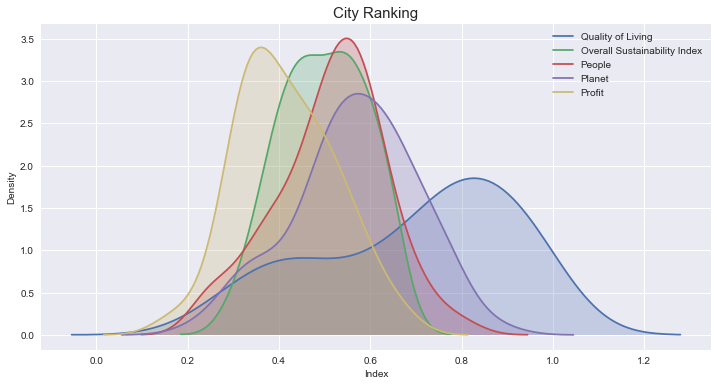

In [40]:
# distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data.QoL, shade=True, label='Quality of Living')
sns.kdeplot(data.Sustainability, shade=True, label='Overall Sustainability Index')
sns.kdeplot(data.People, shade=True, label='People')
sns.kdeplot(data.Planet, shade=True, label='Planet')
sns.kdeplot(data.Profit, shade=True, label='Profit')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('City Ranking', fontsize=15)

In [42]:
data.skew()

Sustainability   -0.114455
People           -0.302161
Planet           -0.296163
Profit            0.232347
QoL              -0.533290
dtype: float64

In [43]:
data.kurt()

Sustainability   -0.914475
People            0.012878
Planet           -0.166022
Profit           -0.288290
QoL              -0.883643
dtype: float64

In [25]:
data.corr()

,Overall Sustainability Ranking,People,Planet,Profit,Quality of Living
Overall Sustainability Ranking,1.000000,0.732580,0.829061,0.714890,0.524046
People,0.732580,1.000000,0.402182,0.265016,0.145213
Planet,0.829061,0.402182,1.000000,0.430859,0.702731
Profit,0.714890,0.265016,0.430859,1.000000,0.304645
Quality of Living,0.524046,0.145213,0.702731,0.304645,1.000000


                Sustainability    People    Planet    Profit       QoL
Sustainability        1.000000  0.732580  0.829061  0.714890  0.524046
People                0.732580  1.000000  0.402182  0.265016  0.145213
Planet                0.829061  0.402182  1.000000  0.430859  0.702731
Profit                0.714890  0.265016  0.430859  1.000000  0.304645
QoL                   0.524046  0.145213  0.702731  0.304645  1.000000
Axes(0.125,0.125;0.62x0.755)


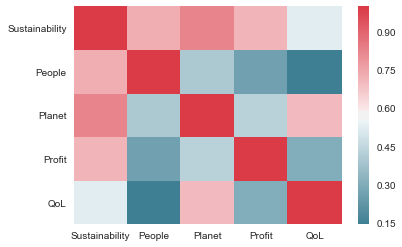

In [61]:
# check for colinearity or multicolinearity
#plt.figure(figsize = (8,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


# OLS Linear Regression On Quality of Living

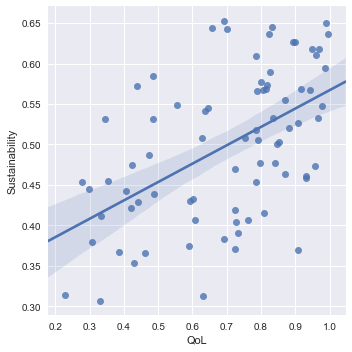

In [46]:
sns.lmplot('QoL','Sustainability', data)

In [50]:
X = data.QoL
y = data.Sustainability

# fit to a OLS Regression
lm3 = smf.ols(formula='y ~ X', data=data).fit()
#print the full summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     28.77
Date:                Fri, 11 Jan 2019   Prob (F-statistic):           8.48e-07
Time:                        15:58:01   Log-Likelihood:                 88.174
No. Observations:                  78   AIC:                            -172.3
Df Residuals:                      76   BIC:                            -167.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3400      0.031     10.998      0.000         0.278     0.402
X              0.2270      0.042      5.364      0.000         0.143     0.311
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.575
Skew:                          -0.052   Prob(JB):                        0.455
Kurtosis:                       2.312   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

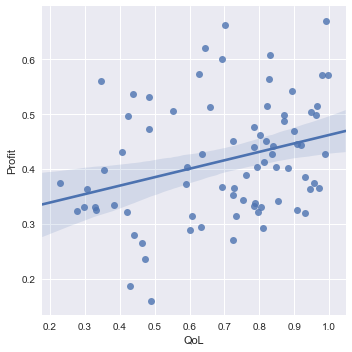

In [48]:
sns.lmplot('QoL','Profit', data)

In [51]:
X = data.QoL
y = data.Profit

# fit to a OLS Regression
lm3 = smf.ols(formula='y ~ X', data=data).fit()
#print the full summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     7.775
Date:                Fri, 11 Jan 2019   Prob (F-statistic):            0.00669
Time:                        15:59:34   Log-Likelihood:                 67.255
No. Observations:                  78   AIC:                            -130.5
Df Residuals:                      76   BIC:                            -125.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3080      0.040      7.620      0.000         0.228     0.389
X              0.1543      0.055      2.788      0.007         0.044     0.265
==============================================================================
Omnibus:                        2.490   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                2.425
Skew:                           0.373   Prob(JB):                        0.297
Kurtosis:                       2.564   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

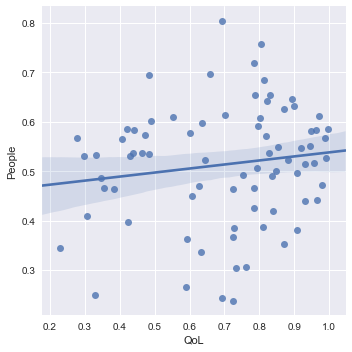

In [47]:
sns.lmplot('QoL','People', data)

In [52]:
X = data.QoL
y = data.People

# fit to a OLS Regression
lm3 = smf.ols(formula='y ~ X', data=data).fit()
#print the full summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.637
Date:                Fri, 11 Jan 2019   Prob (F-statistic):              0.205
Time:                        15:59:55   Log-Likelihood:                 56.010
No. Observations:                  78   AIC:                            -108.0
Df Residuals:                      76   BIC:                            -103.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4564      0.047      9.774      0.000         0.363     0.549
X              0.0818      0.064      1.280      0.205        -0.046     0.209
==============================================================================
Omnibus:                        1.107   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                1.014
Skew:                          -0.273   Prob(JB):                        0.602
Kurtosis:                       2.879   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

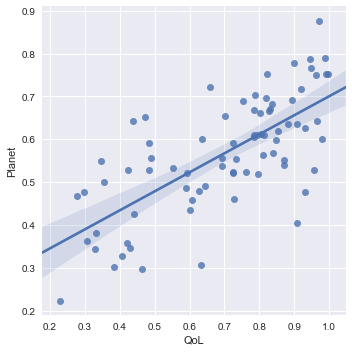

In [49]:
sns.lmplot('QoL','Planet', data)

In [53]:
X = data.QoL
y = data.Planet

# fit to a OLS Regression
lm3 = smf.ols(formula='y ~ X', data=data).fit()
#print the full summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     74.15
Date:                Fri, 11 Jan 2019   Prob (F-statistic):           7.43e-13
Time:                        16:00:03   Log-Likelihood:                 72.697
No. Observations:                  78   AIC:                            -141.4
Df Residuals:                      76   BIC:                            -136.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2560      0.038      6.789      0.000         0.181     0.331
X              0.4444      0.052      8.611      0.000         0.342     0.547
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.716
Skew:                          -0.220   Prob(JB):                        0.699
Kurtosis:                       2.839   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Linear Regression

             QoL    People    Profit    Planet
QoL     1.000000  0.145213  0.304645  0.702731
People  0.145213  1.000000  0.265016  0.402182
Profit  0.304645  0.265016  1.000000  0.430859
Planet  0.702731  0.402182  0.430859  1.000000
Axes(0.125,0.125;0.62x0.755)


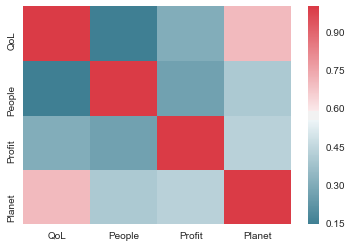

In [56]:
# Get rid of Overall Sustainability Ranking because of potential multicolinearity & check heatmap again
cmap = sns.diverging_palette(220, 10, as_cmap=True)
columns = ['QoL','People','Profit','Planet']
correlations = data[columns].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)



In [63]:
from sklearn import grid_search
from sklearn import cross_validation

In [67]:
features = ['People','Profit','Planet']
modeldata = data[features]
y = data['QoL']

In [152]:
#SDG Regressor
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,
          'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
          'fit_intercept': [True, False],
           #'penalty': ['l2', 'l1', 'elasticnet']
          } # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False], 'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [153]:
gs.best_estimator_

SGDRegressor(alpha=9.9999999999999995e-07, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='epsilon_insensitive', n_iter=5,
       penalty='l2', power_t=0.25, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [154]:
gs.best_score_

0.0994227733971498

In [155]:
#r2 
gs.best_estimator_.coef_

array([ 0.19646311,  0.17736226,  0.27774256])

In [156]:
#create dataframe with all results for feature specific importance
results = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
results.columns = ['Features','SDG']
results

,Features,SDG
0,People,0.196463
1,Profit,0.177362
2,Planet,0.277743


In [157]:
#Ridge
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,'fit_intercept': [True, False],'normalize': [True, False]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [158]:
gs.best_estimator_

Ridge(alpha=1e-10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [159]:
gs.best_score_

0.43753880395537254

In [160]:
gs.best_estimator_.coef_

array([-0.17690336,  0.142405  ,  1.28083084])

In [161]:
#make Ridge df
ridge = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
ridge.columns = ['Features','Ridge']
ridge

,Features,Ridge
0,People,-0.176903
1,Profit,0.142405
2,Planet,1.280831


In [162]:
#merge
results = results.merge(ridge)
results

,Features,SDG,Ridge
0,People,0.196463,-0.176903
1,Profit,0.177362,0.142405
2,Planet,0.277743,1.280831


In [172]:
#Lasso
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,'fit_intercept': [True, False],'normalize': [True, False]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [174]:
gs.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [175]:
gs.best_score_

0.4307950556607224

In [176]:
gs.best_estimator_.coef_

array([-0.28201194,  0.03407587,  1.19381281])

In [177]:
#make Lasso df
lasso = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
lasso.columns = ['Features','Lasso']
lasso

,Features,Lasso
0,People,-0.282012
1,Profit,0.034076
2,Planet,1.193813


In [178]:
#merge
results = results.merge(lasso)
results

,Features,SDG,Ridge,Lasso
0,People,0.196463,-0.176903,-0.282012
1,Profit,0.177362,0.142405,0.034076
2,Planet,0.277743,1.280831,1.193813


## Best Scores: 

|Linear Model | Best Score (R2) |
|---|---|
| __SDG__ | 0.994227733971498 | 
| __Ridge__ | 0.43753880395537254| 
| __Lasso__ | 0.4307950556607224 |

While the Ridge and Lasso model showed similar results, the SDG Regressor showed a very poor R2 result. Therefore we will focus on looking at Ridge and Lasso. However, when compared to a simple linear regression done on the Planet variable, we see that we can obtain an R2 value of 0.489 which is higher than any of the multi-variate regression models. Therefore, for this analysis, the variable Planet Index alone best describes the Quality of Living.

# Narrowing into Planet

## Exploratory Analysis

In [181]:
planet = pd.read_csv('planet_features.csv')

In [182]:
planet

,City,QoL,GHG,Green_Space,Congestion_Delays,Bikes,Air_Pollution,Transport_Emission_Effort,Electric_Vehicle
0,Hong Kong,0.693,0.885,0.849,0.421,0.163,0.50,0.427,0.50
1,Zurich,0.991,0.730,1.000,0.637,0.599,1.00,0.504,1.00
2,Paris,0.831,0.649,0.191,0.374,0.654,1.00,0.954,1.00
3,Seoul,0.658,0.908,0.560,0.627,0.654,1.00,0.600,1.00
4,Prague,0.701,0.779,0.956,0.610,0.163,0.25,0.954,0.25
5,Vienna,0.996,0.689,0.967,0.539,0.654,1.00,0.654,1.00
6,London,0.823,0.730,0.698,0.327,0.654,1.00,0.954,1.00
7,Singapore,0.892,0.820,0.991,0.468,0.327,1.00,0.496,1.00
8,Stockholm,0.900,0.685,0.849,0.610,0.872,1.00,0.654,1.00
9,Frankfurt,0.970,0.781,1.000,0.610,0.981,1.00,0.954,1.00


In [183]:
planet.count()

City                         92
QoL                          78
GHG                          92
Green_Space                  92
Congestion_Delays            92
Bikes                        92
Air_Pollution                92
Transport_Emission_Effort    92
Electric_Vehicle             92
dtype: int64

In [184]:
# drop rows that do not have quality of living data
planet = planet.dropna()
planet

,City,QoL,GHG,Green_Space,Congestion_Delays,Bikes,Air_Pollution,Transport_Emission_Effort,Electric_Vehicle
0,Hong Kong,0.693,0.885,0.849,0.421,0.163,0.50,0.427,0.50
1,Zurich,0.991,0.730,1.000,0.637,0.599,1.00,0.504,1.00
2,Paris,0.831,0.649,0.191,0.374,0.654,1.00,0.954,1.00
3,Seoul,0.658,0.908,0.560,0.627,0.654,1.00,0.600,1.00
4,Prague,0.701,0.779,0.956,0.610,0.163,0.25,0.954,0.25
5,Vienna,0.996,0.689,0.967,0.539,0.654,1.00,0.654,1.00
6,London,0.823,0.730,0.698,0.327,0.654,1.00,0.954,1.00
7,Singapore,0.892,0.820,0.991,0.468,0.327,1.00,0.496,1.00
8,Stockholm,0.900,0.685,0.849,0.610,0.872,1.00,0.654,1.00
9,Frankfurt,0.970,0.781,1.000,0.610,0.981,1.00,0.954,1.00


In [185]:
planet.count()

City                         78
QoL                          78
GHG                          78
Green_Space                  78
Congestion_Delays            78
Bikes                        78
Air_Pollution                78
Transport_Emission_Effort    78
Electric_Vehicle             78
dtype: int64

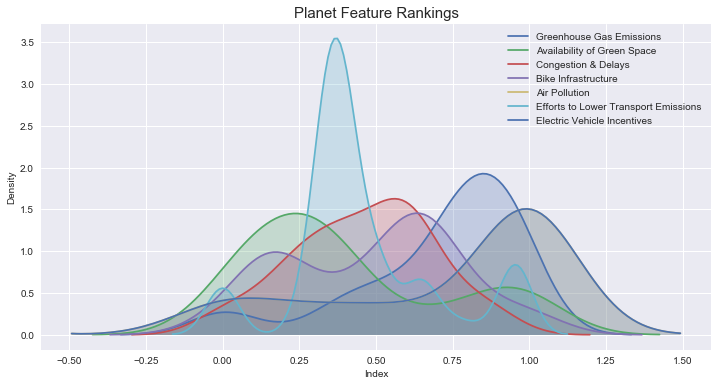

In [187]:
# distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(planet.GHG, shade=True, label='Greenhouse Gas Emissions')
sns.kdeplot(planet.Green_Space, shade=True, label='Availability of Green Space')
sns.kdeplot(planet.Congestion_Delays, shade=True, label='Congestion & Delays')
sns.kdeplot(planet.Bikes, shade=True, label='Bike Infrastructure')
sns.kdeplot(planet.Air_Pollution, shade=True, label='Air Pollution')
sns.kdeplot(planet.Transport_Emission_Effort, shade=True, label='Efforts to Lower Transport Emissions')
sns.kdeplot(planet.Electric_Vehicle, shade=True, label='Electric Vehicle Incentives')
plt.xlabel('Index', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Planet Feature Rankings', fontsize=15)

                                QoL       GHG  Green_Space  Congestion_Delays  \
QoL                        1.000000 -0.439118     0.263349           0.661960   
GHG                       -0.439118  1.000000     0.063795          -0.590320   
Green_Space                0.263349  0.063795     1.000000           0.182265   
Congestion_Delays          0.661960 -0.590320     0.182265           1.000000   
Bikes                      0.484528 -0.097489    -0.001080           0.275131   
Air_Pollution              0.344648 -0.261206    -0.014023           0.308955   
Transport_Emission_Effort  0.477543 -0.046589     0.085752           0.225162   
Electric_Vehicle           0.344648 -0.261206    -0.014023           0.308955   

                              Bikes  Air_Pollution  Transport_Emission_Effort  \
QoL                        0.484528       0.344648                   0.477543   
GHG                       -0.097489      -0.261206                  -0.046589   
Green_Space               -

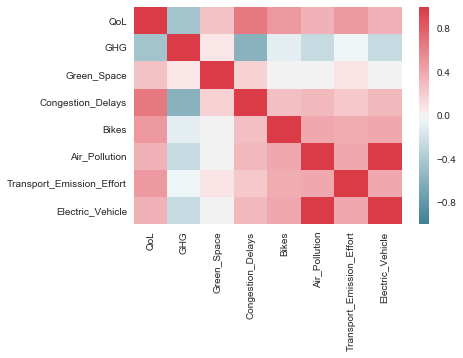

In [252]:
# check for colinearity or multicolinearity
#plt.figure(figsize = (8,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = planet.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

## Multivariate Regression Model

In [191]:
features = ['GHG',
            'Green_Space',
            'Congestion_Delays',
            'Bikes',
            'Air_Pollution',
            'Transport_Emission_Effort',
            'Electric_Vehicle']
modeldata = planet[features]
y = planet['QoL']

In [204]:
#Ridge
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,'fit_intercept': [True, False],'normalize': [True, False]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [205]:
gs.best_estimator_

Ridge(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [206]:
gs.best_score_

0.53590333873869

In [207]:
gs.best_estimator_.coef_

array([-0.14693323,  0.11324909,  0.34722113,  0.1933649 , -0.00437036,
        0.23035461, -0.00437036])

In [208]:
#make Ridge df
ridge = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
ridge.columns = ['Features','Ridge']
ridge

,Features,Ridge
0,GHG,-0.146933
1,Green_Space,0.113249
2,Congestion_Delays,0.347221
3,Bikes,0.193365
4,Air_Pollution,-0.004370
5,Transport_Emission_Effort,0.230355
6,Electric_Vehicle,-0.004370


In [221]:
#Lasso
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,'fit_intercept': [True, False],'normalize': [True, False]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [222]:
gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [223]:
gs.best_score_

0.5830772282765903

In [224]:
gs.best_estimator_.coef_

array([-0.13541146,  0.11161539,  0.36772894,  0.19356322, -0.00041263,
        0.22883091, -0.00316474])

In [226]:
#make Lasso df
results = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
results.columns = ['Features','Lasso']
results

,Features,Lasso
0,GHG,-0.135411
1,Green_Space,0.111615
2,Congestion_Delays,0.367729
3,Bikes,0.193563
4,Air_Pollution,-0.000413
5,Transport_Emission_Effort,0.228831
6,Electric_Vehicle,-0.003165


In [227]:
results = results.merge(ridge)
results

,Features,Lasso,Ridge
0,GHG,-0.135411,-0.146933
1,Green_Space,0.111615,0.113249
2,Congestion_Delays,0.367729,0.347221
3,Bikes,0.193563,0.193365
4,Air_Pollution,-0.000413,-0.004370
5,Transport_Emission_Effort,0.228831,0.230355
6,Electric_Vehicle,-0.003165,-0.004370


In [228]:
results.sort(columns='Lasso',ascending = False)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Features,Lasso,Ridge
2,Congestion_Delays,0.367729,0.347221
5,Transport_Emission_Effort,0.228831,0.230355
3,Bikes,0.193563,0.193365
1,Green_Space,0.111615,0.113249
4,Air_Pollution,-0.000413,-0.004370
6,Electric_Vehicle,-0.003165,-0.004370
0,GHG,-0.135411,-0.146933


Results show that the Lasso model gives the highest R2 of 0.583, which is higher than the single variable linear model. Looking at the coefficients however show that GHG emissions, air pollution, and electric vehicle incentives are bringing down the model to be less fit. Therefore we will redo the Lasso model excluding those 3 variables.


## Fine Tuning Model

In [253]:
features = ['GHG',
            'Green_Space',
            'Congestion_Delays',
            'Bikes',
            'Transport_Emission_Effort',
            'Electric_Vehicle']
modeldata = planet[features]
y = planet['QoL']

In [269]:
#Lasso
alphas = np.logspace(-10, -1, 10)
print alphas
params = {'alpha':alphas,'fit_intercept': [True, False],'normalize': [True, False]}
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='r2',
    )

gs.fit(modeldata, y)
    

[  1.00000000e-10   1.00000000e-09   1.00000000e-08   1.00000000e-07
   1.00000000e-06   1.00000000e-05   1.00000000e-04   1.00000000e-03
   1.00000000e-02   1.00000000e-01]


GridSearchCV(cv=sklearn.cross_validation.KFold(n=78, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [270]:
gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [271]:
gs.best_score_

0.5841531296869398

In [272]:
gs.best_estimator_.coef_

array([-0.11083199,  0.09202232,  0.37767795,  0.17699228,  0.21576876,  0.        ])

In [273]:
#make Lasso df
results = pd.DataFrame(zip(features,gs.best_estimator_.coef_))
results.columns = ['Features','Lasso']
results

,Features,Lasso
0,GHG,-0.110832
1,Green_Space,0.092022
2,Congestion_Delays,0.377678
3,Bikes,0.176992
4,Transport_Emission_Effort,0.215769
5,Electric_Vehicle,0.000000


In [274]:
results.sort(columns='Lasso',ascending = False)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Features,Lasso
2,Congestion_Delays,0.377678
4,Transport_Emission_Effort,0.215769
3,Bikes,0.176992
1,Green_Space,0.092022
5,Electric_Vehicle,0.000000
0,GHG,-0.110832
